In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
from tqdm import *
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import corner

from scipy.linalg import eigh


from sklearn.preprocessing import StandardScaler




# Set up some parameters for pretty plots
plt.rcParams.update({
    'figure.dpi': 200,
    "text.usetex": True,
    "pgf.rcfonts": False,
    "font.family": "serif",
    "font.size": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "figure.max_open_warning": False,
})


import tensorflow as tf
from tqdm import *
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3" 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Num GPUs Available:  1


In [4]:
path = '/clusterfs/ml4hep/mpettee/GaiaCWoLa/gaia_data/gd1/'
### Note: these are the same patches as in https://arxiv.org/abs/2104.12789
patch_list = [
 # b = 33.7 
 './gaia_data/gd1/gaiascan_l195.0_b33.7_ra128.4_dec28.8.npy',
 './gaia_data/gd1/gaiascan_l210.0_b33.7_ra132.6_dec16.9.npy',
 './gaia_data/gd1/gaiascan_l225.0_b33.7_ra138.1_dec5.7.npy', 
 # b = 41.8 
 './gaia_data/gd1/gaiascan_l187.5_b41.8_ra136.5_dec36.1.npy',
 './gaia_data/gd1/gaiascan_l202.5_b41.8_ra138.8_dec25.1.npy',
 './gaia_data/gd1/gaiascan_l217.5_b41.8_ra142.7_dec14.5.npy', 
 # b = 50.2 
 './gaia_data/gd1/gaiascan_l99.0_b50.2_ra224.7_dec60.6.npy',
 './gaia_data/gd1/gaiascan_l117.0_b50.2_ra202.4_dec66.5.npy',
 './gaia_data/gd1/gaiascan_l135.0_b50.2_ra174.3_dec65.1.npy',
 './gaia_data/gd1/gaiascan_l153.0_b50.2_ra156.2_dec57.5.npy',
 './gaia_data/gd1/gaiascan_l171.0_b50.2_ra148.6_dec47.0.npy',
 './gaia_data/gd1/gaiascan_l189.0_b50.2_ra146.9_dec35.6.npy',
 './gaia_data/gd1/gaiascan_l207.0_b50.2_ra148.6_dec24.2.npy',
 # b = 58.4 
 './gaia_data/gd1/gaiascan_l101.2_b58.4_ra212.7_dec55.2.npy',
 './gaia_data/gd1/gaiascan_l123.8_b58.4_ra192.0_dec58.7.npy',
 './gaia_data/gd1/gaiascan_l146.2_b58.4_ra171.8_dec54.7.npy',
 './gaia_data/gd1/gaiascan_l168.8_b58.4_ra160.5_dec45.5.npy',
 './gaia_data/gd1/gaiascan_l191.2_b58.4_ra156.9_dec34.1.npy',
 # b = 66.4 
 './gaia_data/gd1/gaiascan_l105.0_b66.4_ra203.7_dec49.1.npy',
 './gaia_data/gd1/gaiascan_l135.0_b66.4_ra185.4_dec50.0.npy',
 './gaia_data/gd1/gaiascan_l165.0_b66.4_ra171.4_dec43.0.npy',    
]
# file = 'gaiascan_l117.0_b50.2_ra202.4_dec66.5.npy'
file = 'gaiascan_l195.0_b33.7_ra128.4_dec28.8.npy'
full_path = path + patch_list[9][16:]
df=load_file(full_path)
# df = fiducial_cuts(df)


100%|███████████████████████████████████████| 1985/1985 [01:16<00:00, 26.08it/s]


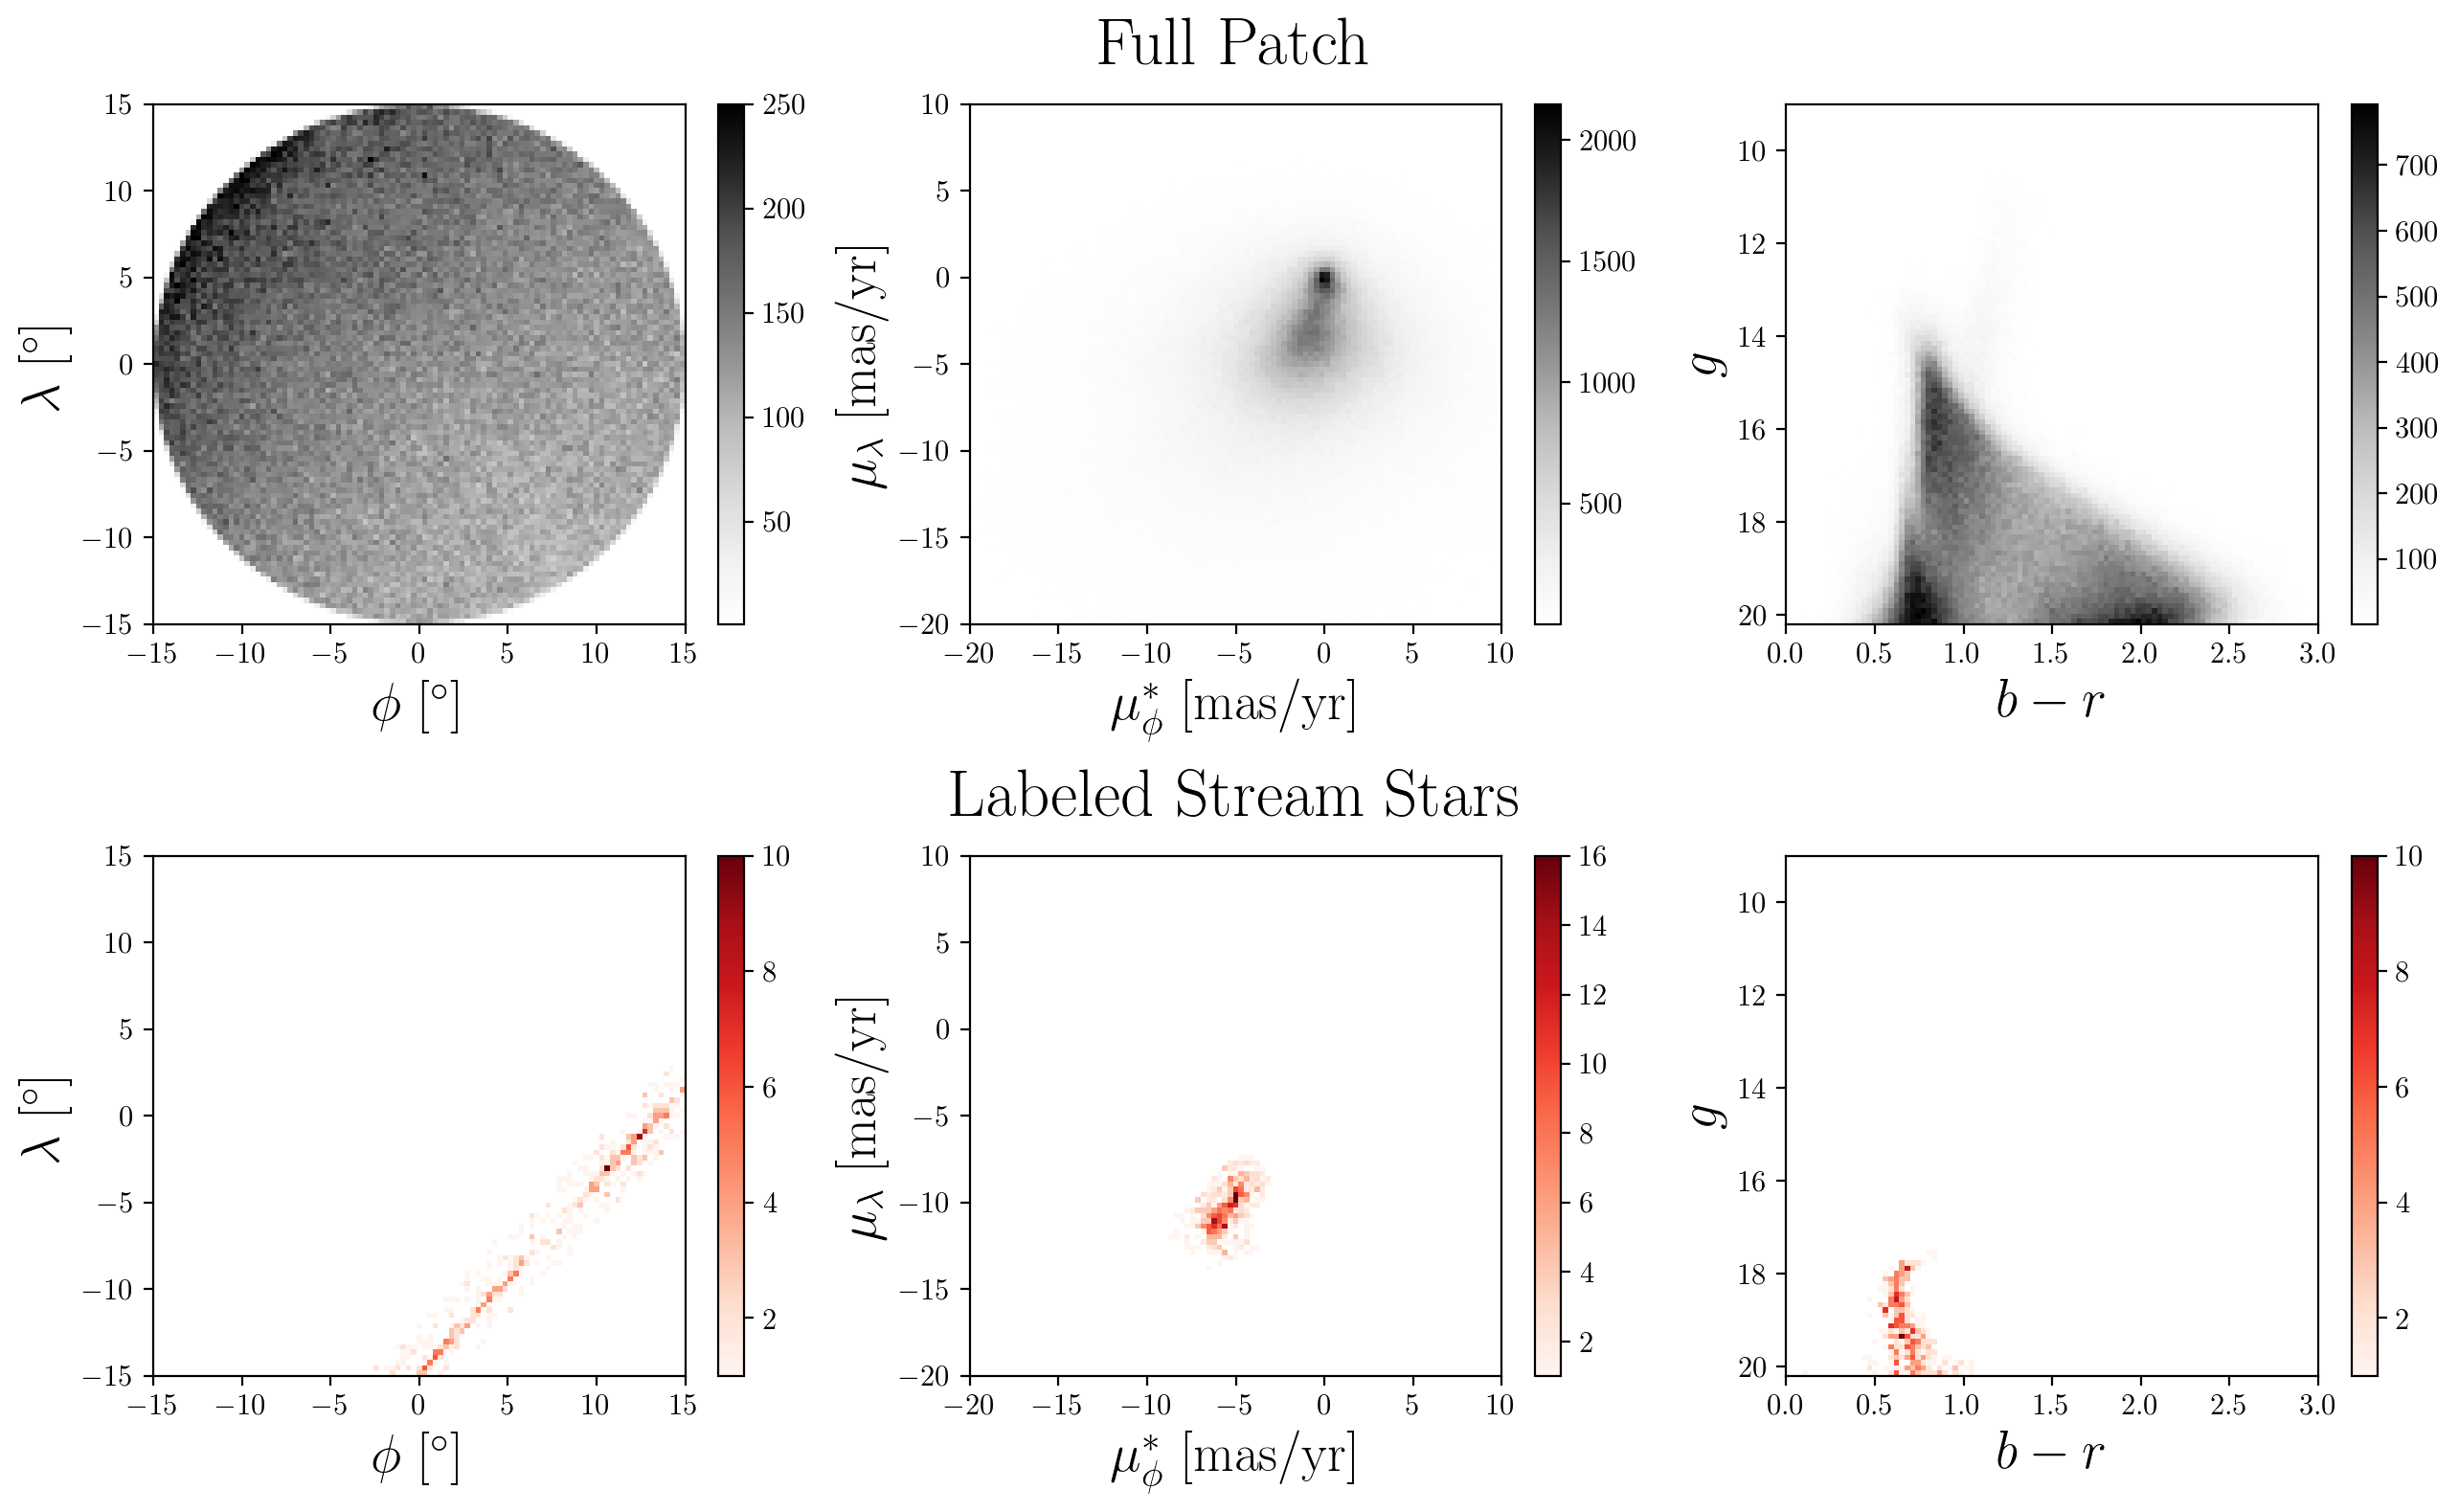

In [5]:
save_folder = "test_gd1_patch_2"
if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)
make_plots(df, save_folder = save_folder)

Scanning over μ_λ
Sideband region: [-14.2,-11.7) & (-9.2,-6.6]
Signal region: [-11.7,-9.2]
Total counts: SR = 84,257, SB = 191,710
Signal region has 421 stream and 83,836 bkg events (0.50%).
Sideband region has 210 stream and 191,500 bkg events (0.11%).
f_sig = 4.6X f_sideband.


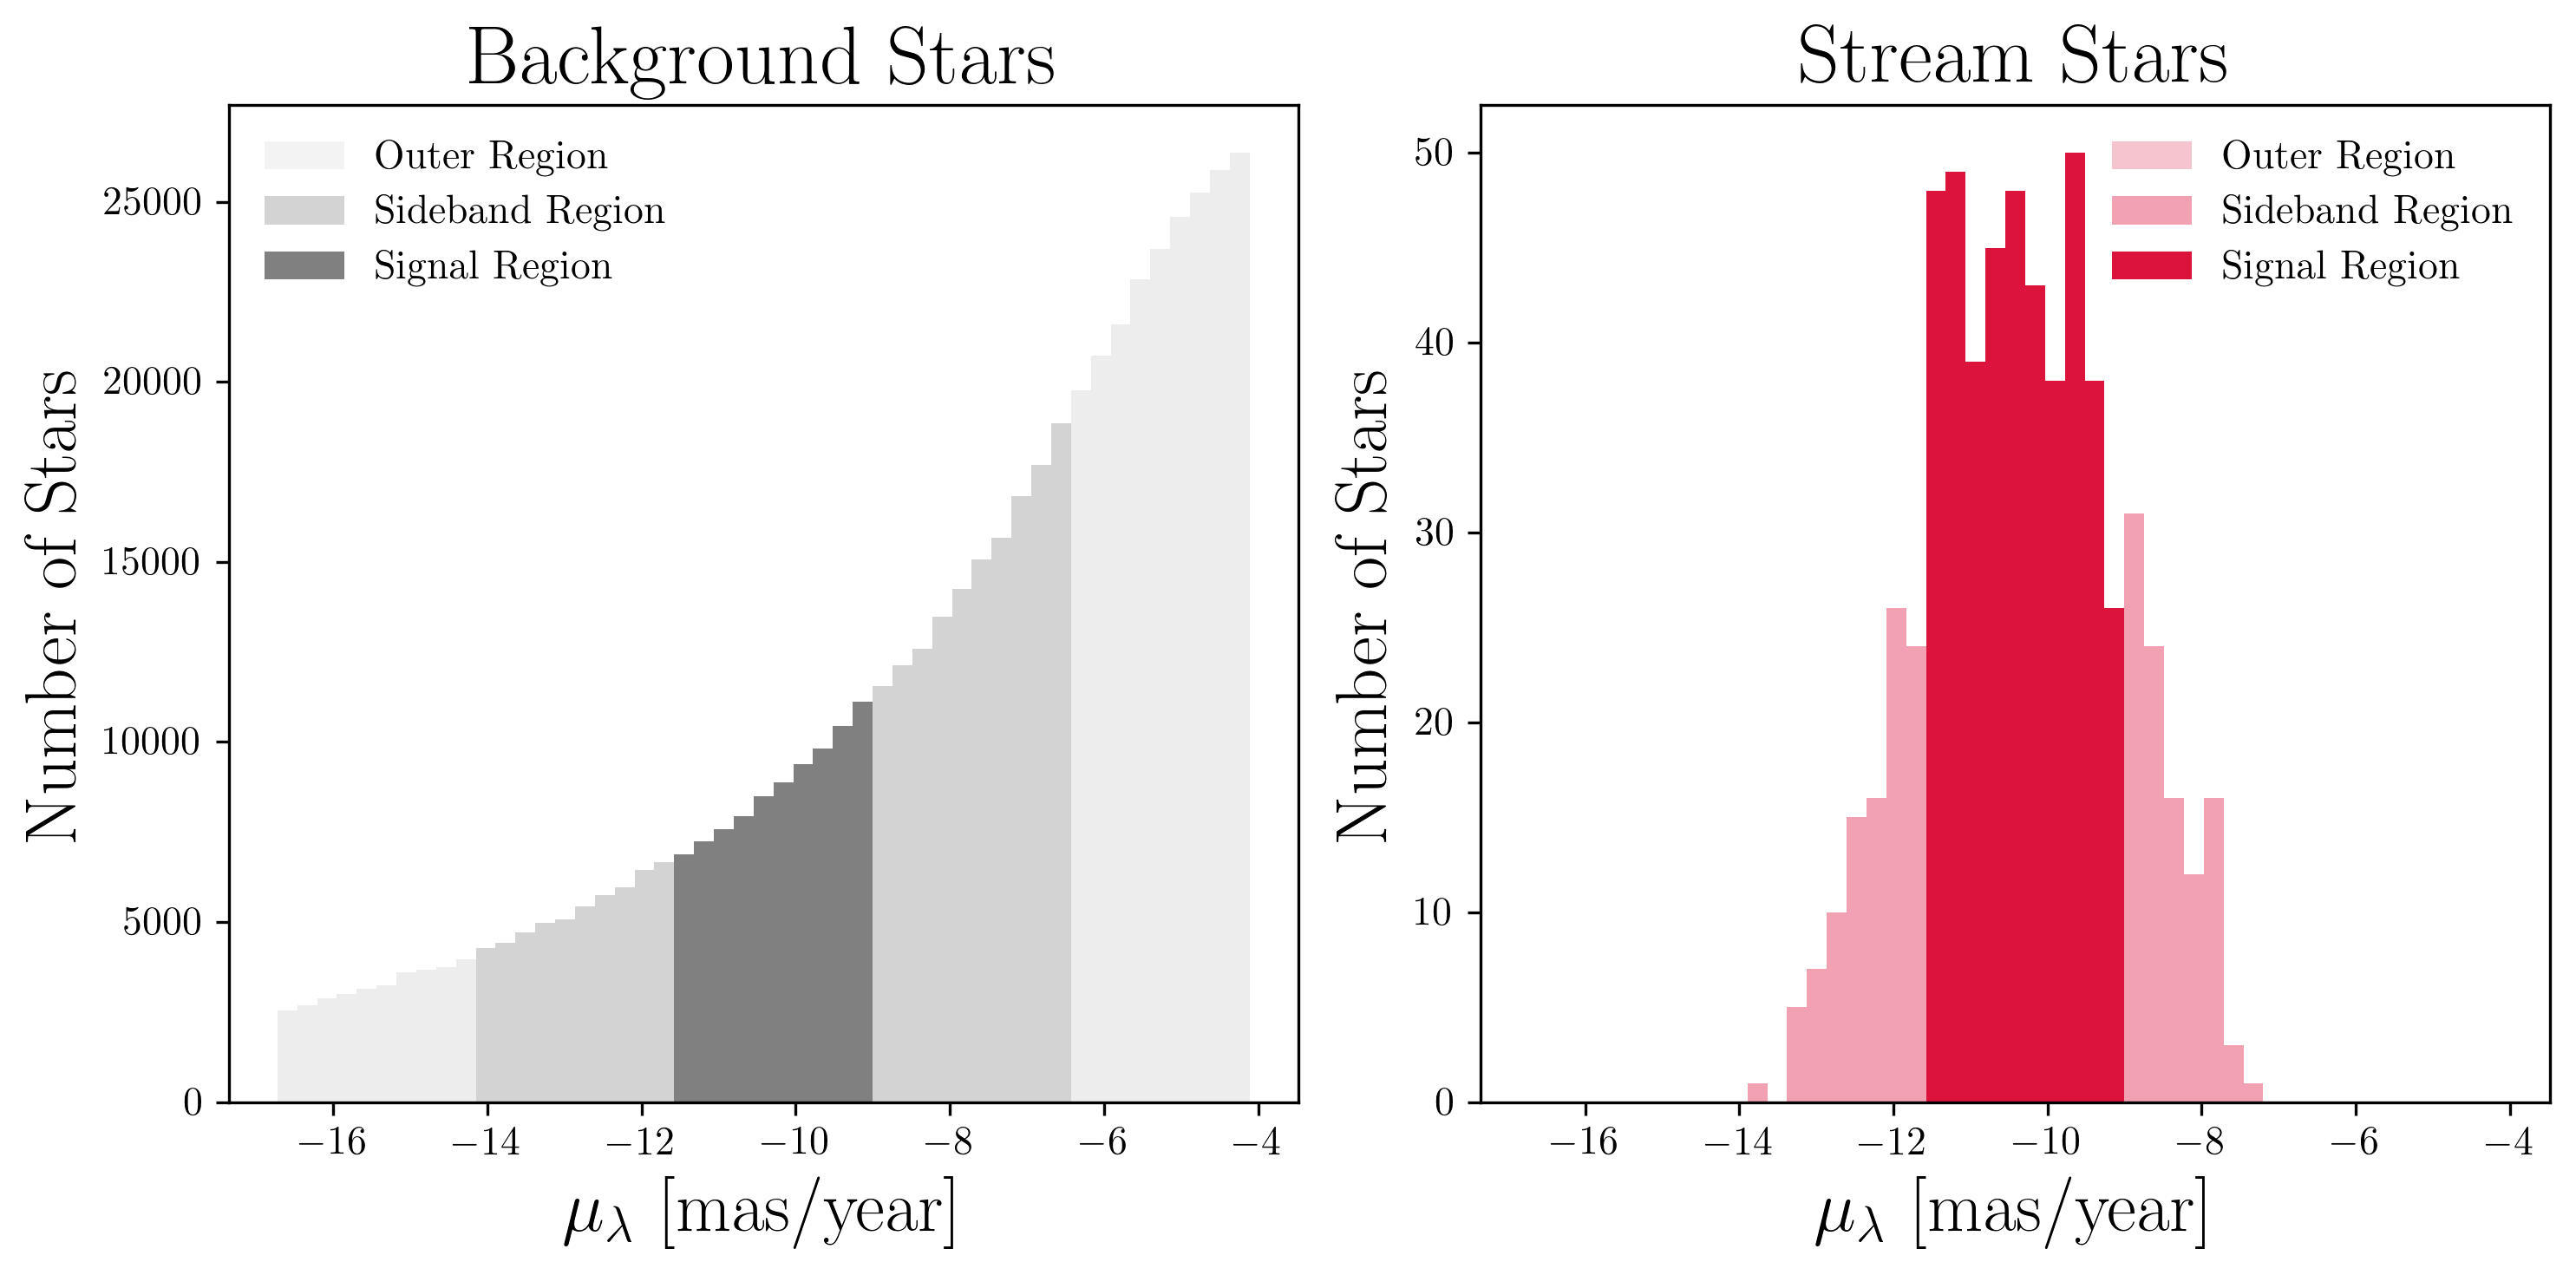

In [6]:
processor = SignalSideband(df, sr_factor=1, sb_factor=3, process=True)
df_slice = processor.df_slice
processor.plot_sb_data()

2023-09-21 16:55:55.605310: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43670 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:c1:00.0, compute capability: 8.6
2023-09-21 16:55:56.859846: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1725/1725 [==============================] - 2s 1ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
1725/1725 [==============================] - 2s 1ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
1725/1725 [==============================] - 2s 961us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
1725/1725 [==============================] - 1s 838us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
1725/1725 [==============================] - 1s 824us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...


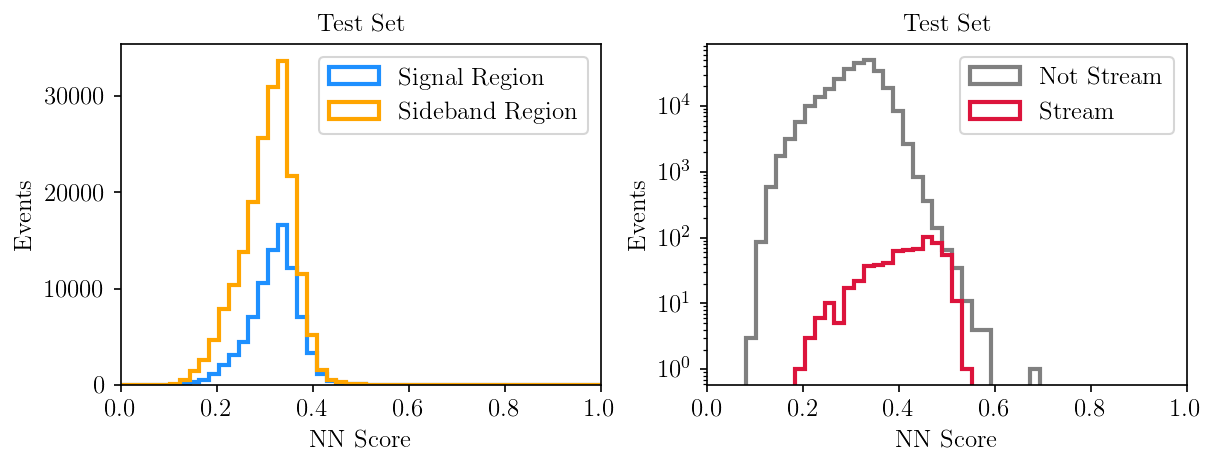

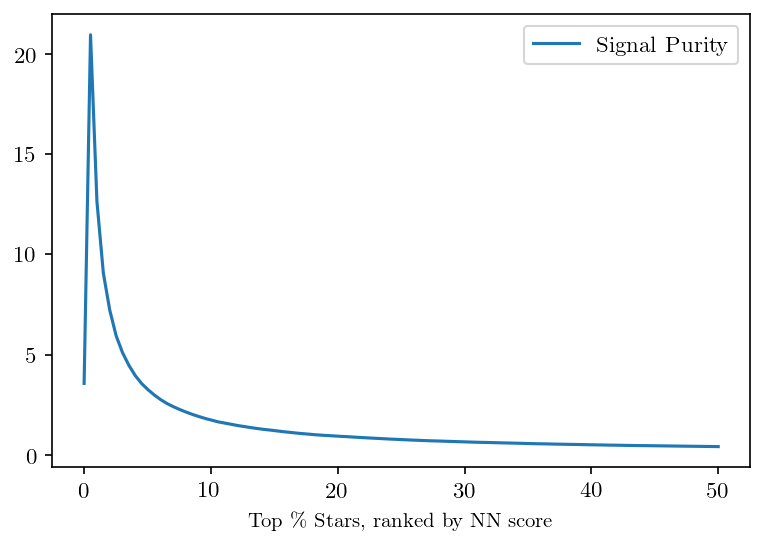

Top 50 stars: Purity = 8.0% 


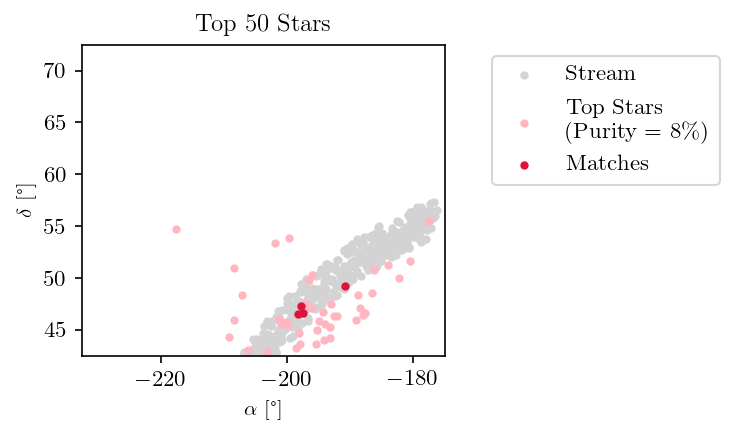

Top 100 stars: Purity = 25.0% 


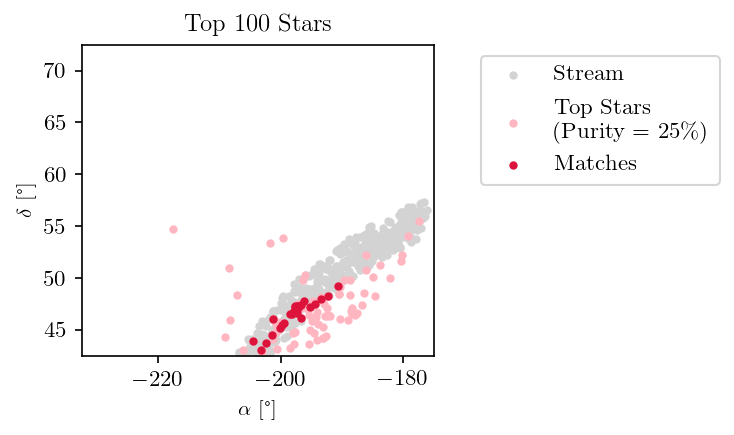

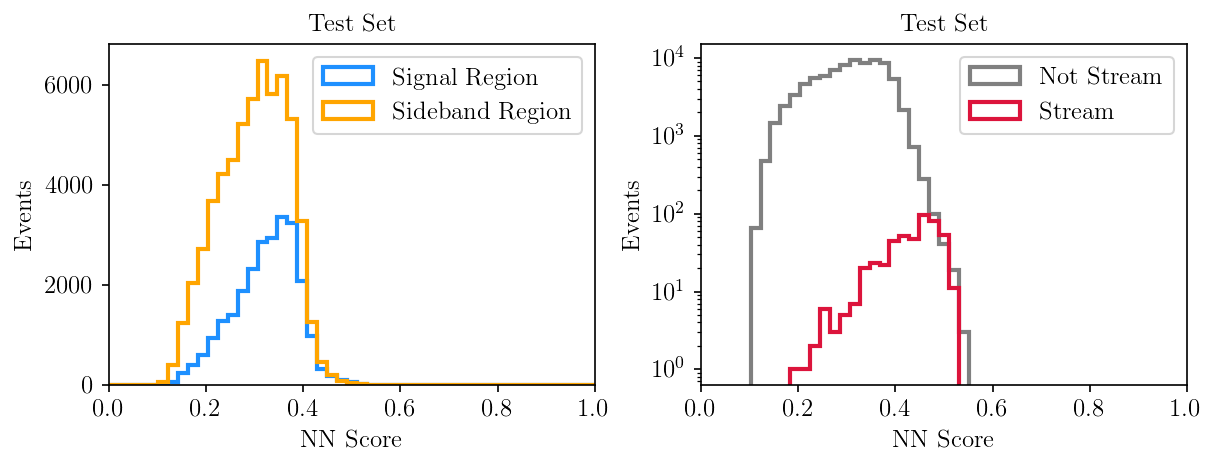

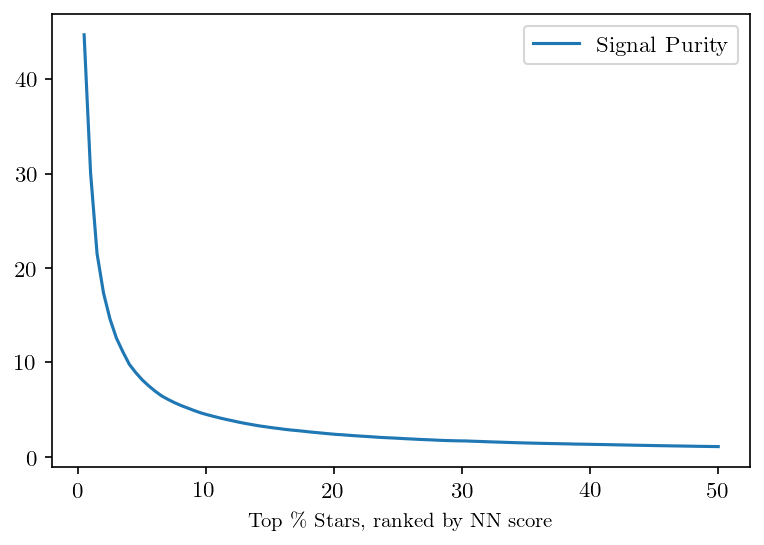

Top 50 stars: Purity = 40.0% 


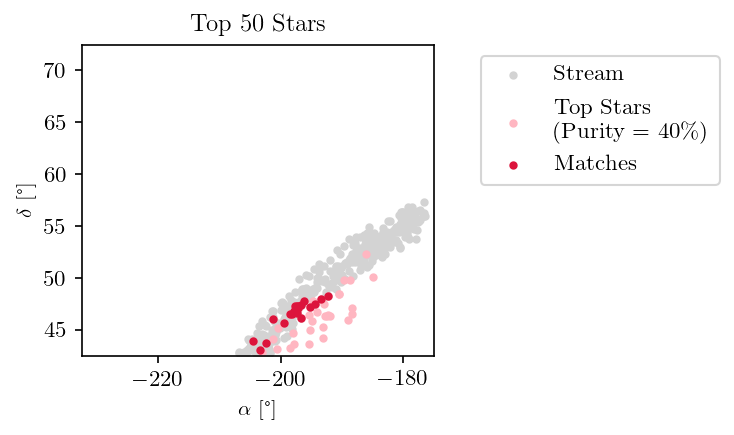

Top 100 stars: Purity = 50.0% 


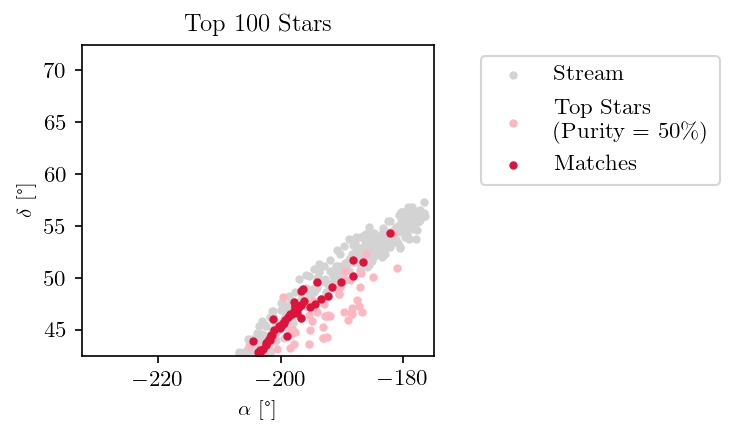

5.0 minutes and 3.9539639949798584 seconds


In [8]:

start_time=time.time()
tf.keras.backend.clear_session()
test = train(df_slice, verbose=False, apply_cuts = True, save_folder = save_folder, scan_over_mu_phi=False)

dt=time.time()-start_time
mins=dt//60
secs=dt-60*mins
print(f'{mins} minutes and {secs} seconds')

In [9]:
df_trained = pd.read_hdf("../notebooks/test_gd1_patch_2/df_test.h5")
df_trained=fiducial_cuts(df_trained)


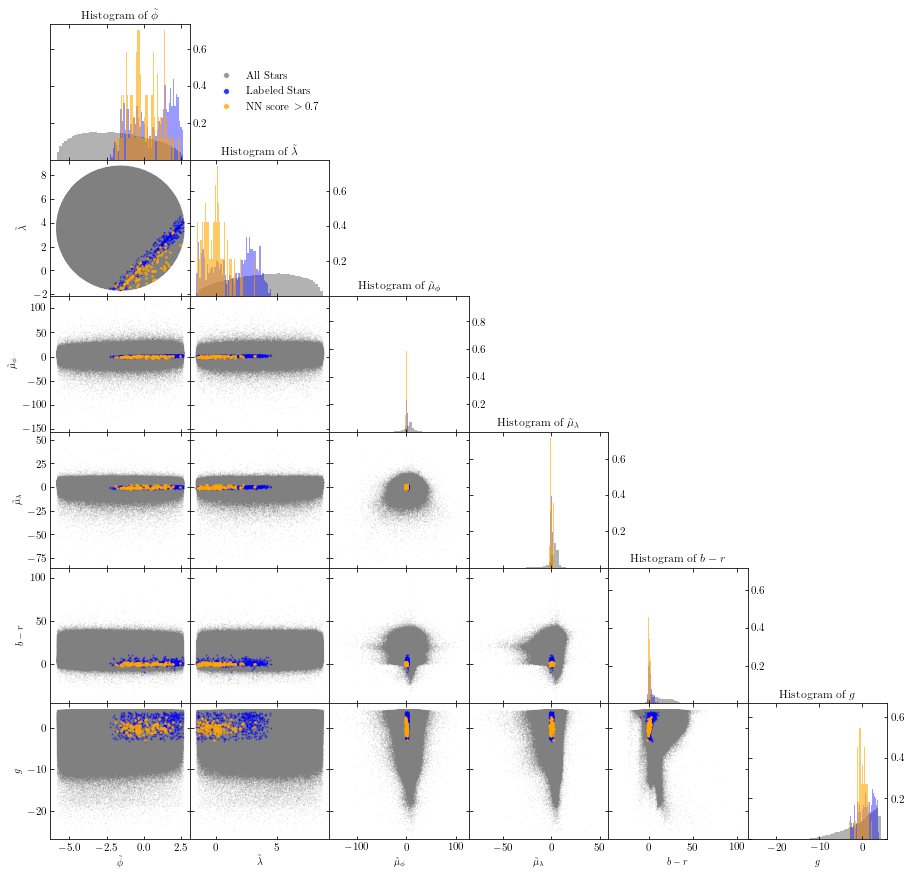

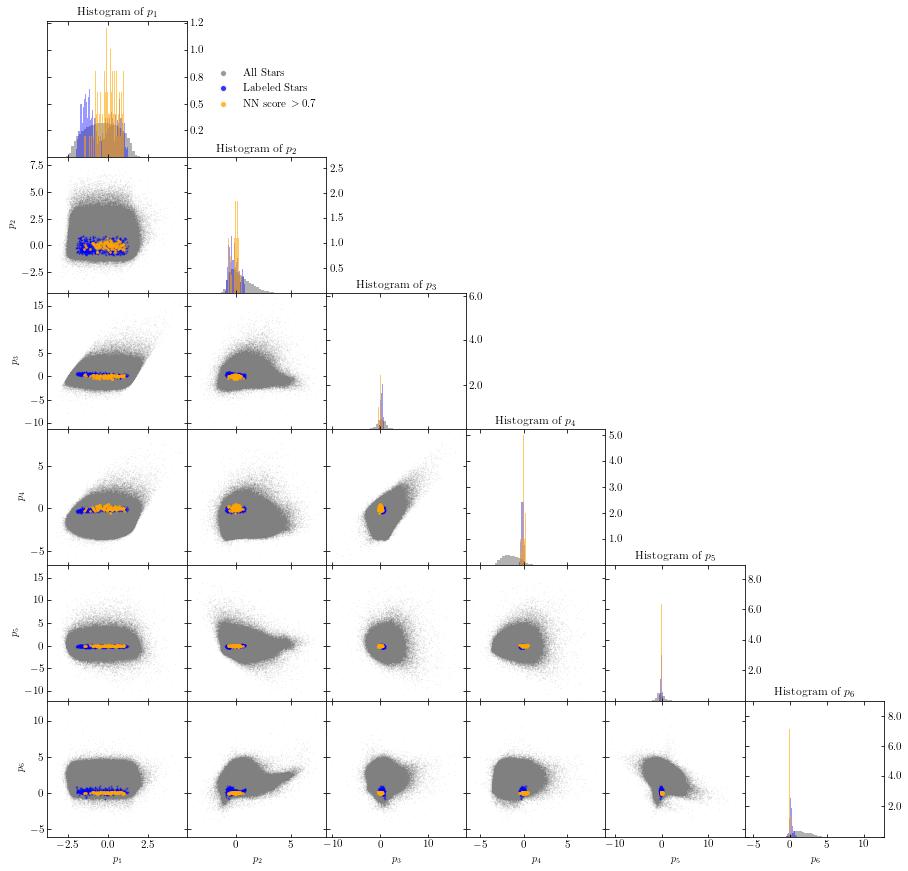

In [10]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# from scipy.linalg import eigh
# import pandas as pd

def standardize_and_eigen(df, df_trained):
    """
    Standardize and find generalized eigenvectors for the top 50 nn_score in df_trained and all data in df.
    
    Parameters:
    - df: DataFrame containing the full data
    - df_trained: DataFrame containing the data with 'nn_score'
    
    Returns:
    - design_full_standardized: Standardized design_full
    - design_nn_standardized: Standardized design_nn
    - sorted_eigenvalues: Sorted eigenvalues
    - sorted_eigenvectors: Sorted eigenvectors
    - is_stream: Boolean array where True indicates 'stream'==1 in df
    - is_top_50_in_df: Boolean array where True indicates that the entry in df is one of the top 50 in df_trained
    """
    
    # Define the columns of interest
    vars = ['ϕ', 'λ', 'μ_ϕcosλ', 'μ_λ', 'b-r', 'g']
    
    # Create the full design matrix
    design_full = df[vars]
    
    # Create the nn design matrix based on the top 50 nn_score
    is_top_50 = df_trained['nn_score'].nlargest(100).index
    design_nn = df_trained.loc[is_top_50, vars]
    
    # Initialize the StandardScaler
    sc = StandardScaler()
    
    # Fit and transform the nn_score design matrix
    design_nn_standardized = sc.fit_transform(design_nn)
    
    # Transform the full design matrix using the same scaling parameters
    design_full_standardized = sc.transform(design_full)
    
    # Step 1: Create covariance matrices
    design_cov = np.cov(design_full_standardized.T)
    design_nn_cov = np.cov(design_nn_standardized.T)
    
    # Step 2: Solve the generalized eigenvalue problem
    eigenvalues, eigenvectors = eigh(design_nn_cov, design_cov)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    
    # Sort the eigenvalues and eigenvectors
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Boolean array indicating where 'stream'==1 in df
    is_stream = df['stream'] == 1
    
    # Boolean array indicating which entries in df are among the top 50 in df_trained
    is_top_50_in_df = df.index.isin(is_top_50)
    
    corner_plots(design_full_standardized, [r'$\tilde{\phi}$', r'$\tilde{\lambda}$', r'$\tilde{\mu}_\phi$', r'$\tilde{\mu}_\lambda$', r'$b-r$', r'$g$'], is_top_50_in_df, is_stream, density=True)
    corner_plots(design_full_standardized @ sorted_eigenvectors, [r'$p_1$',r'$p_2$',r'$p_3$',r'$p_4$',r'$p_5$',r'$p_6$'], is_top_50_in_df, is_stream, density=True)

    pc_vars = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
    new_design = design_full_standardized @ sorted_eigenvectors
    new_vars_df = pd.DataFrame(new_design, columns=pc_vars, index=df.index)
    
    # Create a copy of df and add the new variables
    df_rot = df.copy()
    df_rot = pd.concat([df_rot, new_vars_df], axis=1)
    return df_rot
    
#     return design_full_standardized, design_nn_standardized, sorted_eigenvalues, sorted_eigenvectors, is_stream, is_top_50_in_df

# Example usage
df_rot=standardize_and_eigen(df, df_trained)


Scanning over p6
Sideband region: [-0.7,-0.1) & (0.4,1.0]
Signal region: [-0.1,0.4]
Total counts: SR = 77,783, SB = 209,955
Signal region has 533 stream and 77,250 bkg events (0.69%).
Sideband region has 95 stream and 209,860 bkg events (0.05%).
f_sig = 15.2X f_sideband.


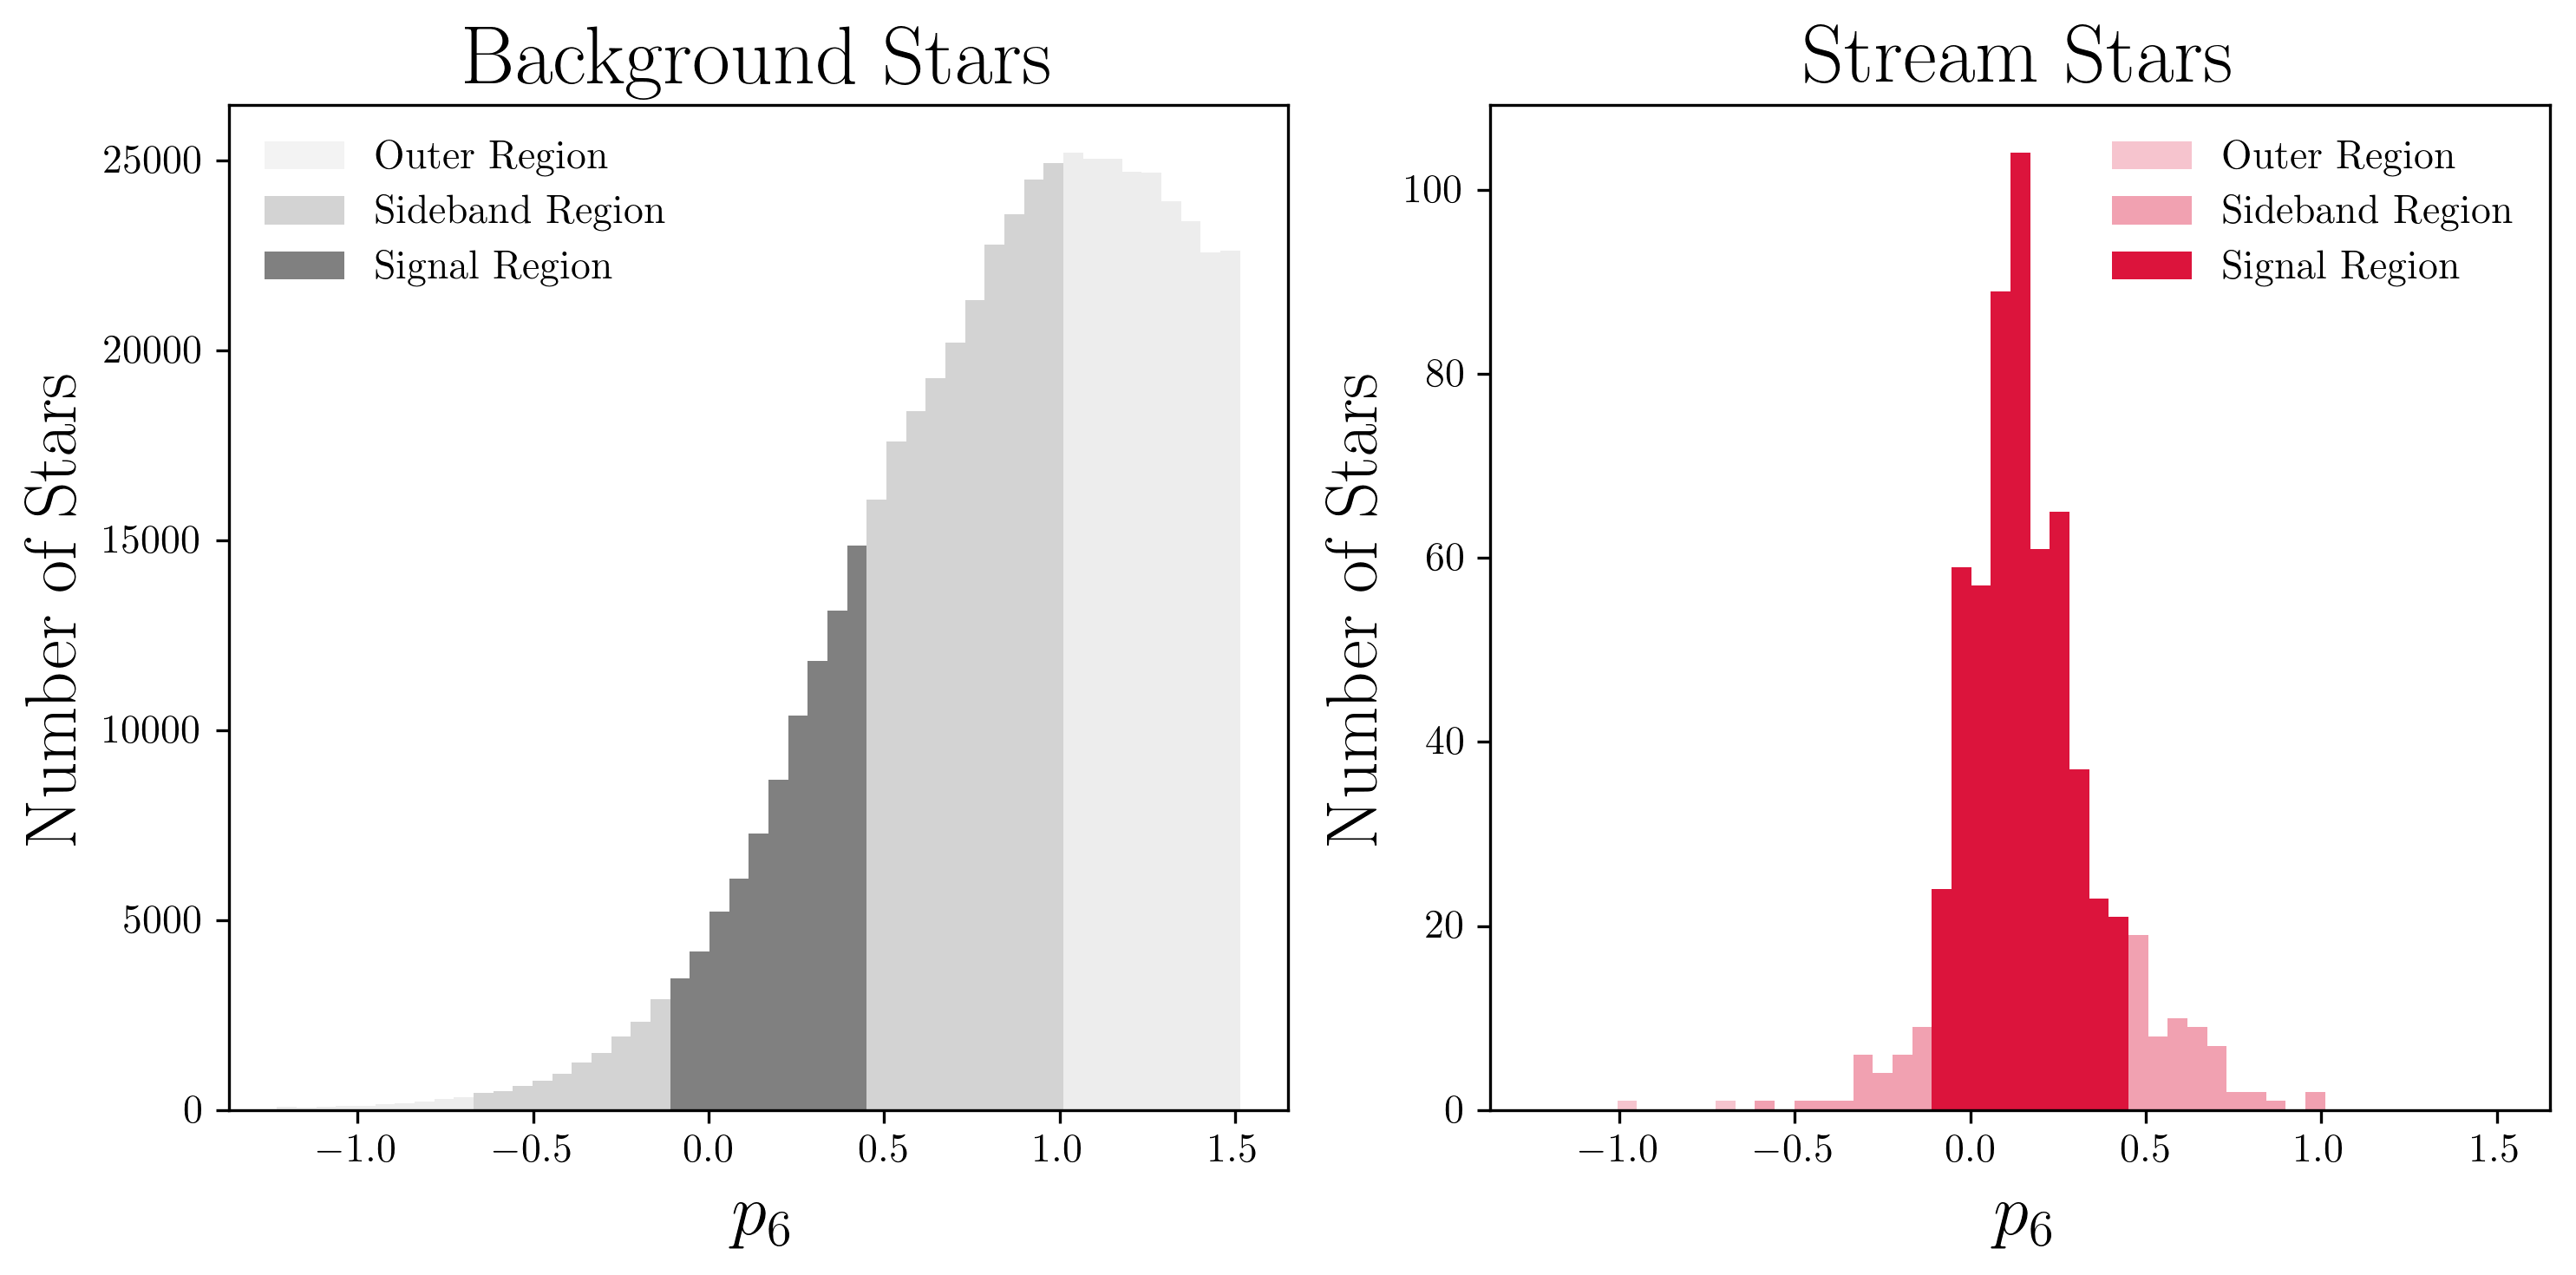

In [11]:
processor = SignalSideband(df_rot, variable='p6',var_name=r'$p_6$', sr_factor=1.3, sb_factor=3.9, process=True)
df_rot_slice = processor.df_slice
# processor = SignalSideband(df_rot_slice, sr_factor=1.2, variable='p5',var_name='p6', sb_factor=3.6, process=True)
# df_rot_slice2 = processor.df_slice
processor.plot_sb_data()

In [ ]:
start_time=time.time()
tf.keras.backend.clear_session()
test = train(df_rot_slice, verbose=False, apply_cuts = True, save_folder = save_folder+' trans', scan_over_mu_phi=False)

dt=time.time()-start_time
mins=dt//60
secs=dt-60*mins
print(f'{mins} minutes and {secs} seconds')